<a href="https://colab.research.google.com/github/akrawat912/Deep-Learning/blob/master/bbc_News_LDA_Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
files.upload()

#### data is on my localhost, you can get data here: https://www.kaggle.com/c/learn-ai-bbc/data
#### then make it unsupervised by dropping target feature since it is supervised multiclassification in real dataset

In [7]:
data=pd.read_csv('BBC train.csv')
documents=data[['Text']]

In [8]:
documents['index']=documents.index

In [9]:
documents[:3]

,Text,index
0,worldcom ex-boss launches defence lawyers defe...,0
1,german business confidence slides german busin...,1
2,bbc poll indicates economic gloom citizens in ...,2


In [10]:
import nltk
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models import LdaModel, CoherenceModel
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from gensim.corpora import Dictionary
from nltk.stem.porter import *
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(2018)

In [11]:
stemmer = SnowballStemmer('english')

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# example, verb POS of word 'paased' is pass
WordNetLemmatizer().lemmatize('passed', pos='v')

'pass'

### Preprocessing

In [ ]:
stemmer.stem('globalization')

'global'

In [17]:
def lemmatize_stemize(text):
    '''reutrns stemized  after lemmatized of word'''
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    '''returns tokenized text after removing stopwords and non stopwords length of less than 3 will be discarded'''
    result=[]
    for token in simple_preprocess(text):
        if token not in STOPWORDS and len(token)>3:
            result.append(lemmatize_stemize(token))
    return result

In [ ]:
# example 
eg='''worldcom ex-boss launches defence lawyers defending former worldcom chief 
bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness'''
preprocess(eg)

['worldcom',
 'boss',
 'launch',
 'defenc',
 'lawyer',
 'defend',
 'worldcom',
 'chief',
 'berni',
 'ebber',
 'batteri',
 'fraud',
 'charg',
 'call',
 'compani',
 'whistleblow',
 'wit']

In [18]:
processed_docs = documents['Text'].map(preprocess)

In [ ]:
processed_docs[:5]

0    [worldcom, boss, launch, defenc, lawyer, defen...
1    [german, busi, confid, slide, german, busi, co...
2    [poll, indic, econom, gloom, citizen, major, n...
3    [lifestyl, govern, mobil, choic, faster, bette...
4    [enron, boss, payout, eighteen, enron, directo...
Name: Text, dtype: object

In [19]:
dic=Dictionary(processed_docs)

In [26]:
count=0
for key, value in dic.iteritems():
    print(key, value)
    count+=1
    if count > 10: break

0 account
1 adjust
2 agre
3 alert
4 andersen
5 answer
6 approv
7 argu
8 arthur
9 audit
10 auditor


### Bag of Words on preprocessed documents

In [44]:
#dic.filter_extremes()
bow=[dic.doc2bow(doc) for doc in processed_docs]
bow[0][:10]
# word with token_id 0 appears 7 times in document

[(0, 7),
 (1, 1),
 (2, 1),
 (3, 2),
 (4, 2),
 (5, 1),
 (6, 1),
 (7, 2),
 (8, 1),
 (9, 1)]

### TF-IDF

In [45]:
from gensim import models
tfidf = models.TfidfModel(bow)

In [46]:
corpus_tfidf = tfidf[bow]

In [47]:
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.2230970706404005),
 (1, 0.05808478262058561),
 (2, 0.0312761860906699),
 (3, 0.11328109777342148),
 (4, 0.17174588526816054),
 (5, 0.04515942803354067),
 (6, 0.042375375878963124),
 (7, 0.06963857504481114),
 (8, 0.07160776962633265),
 (9, 0.05970999099195468),
 (10, 0.12747453181390211),
 (11, 0.047302942377266295),
 (12, 0.058871976362783025),
 (13, 0.06787229845321543),
 (14, 0.03444289247127546),
 (15, 0.03456714911371667),
 (16, 0.054159750123973095),
 (17, 0.02544257038084304),
 (18, 0.07397516399970232),
 (19, 0.022227503720700488),
 (20, 0.08917587194902346),
 (21, 0.07145208602842192),
 (22, 0.05028390223179893),
 (23, 0.039523559874261587),
 (24, 0.04332013572506785),
 (25, 0.03769358992787368),
 (26, 0.06260744753590024),
 (27, 0.04332013572506785),
 (28, 0.05114987105916515),
 (29, 0.2238980792753499),
 (30, 0.08587294263408027),
 (31, 0.02507677942997257),
 (32, 0.041283580141366516),
 (33, 0.03383884309170826),
 (34, 0.024897677003576164),
 (35, 0.0649748419092699)

### Hyperparameter tuning for optimal no. of Topics using Coherence score

####  LDA using BOW

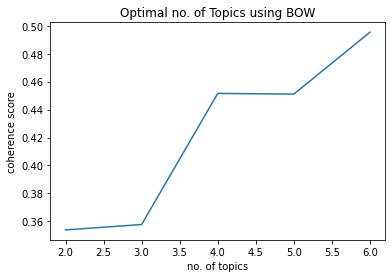

In [49]:
score=[]
model_list=[]
for topic in range(2, 7):
    model = LdaModel(corpus=bow, num_topics=topic, id2word=dic, passes=10, iterations=100)
    cohe = CoherenceModel(model=model, texts=processed_docs)
    model_list.append(model)
    score.append(cohe.get_coherence())
plt.plot(range(2, 7), score)
plt.xlabel('no. of topics')
plt.ylabel('coherence score')
plt.title('Optimal no. of Topics using BOW')
plt.show()

##### Plot showing optimal no. of topics can be 4 or 5, since after 5 score is increasing(may have repeated keywords in the topic). we will be using 5 topics

In [57]:
score

[0.3538619094748582,
 0.3577287660444468,
 0.451571280057423,
 0.451074845573794,
 0.49537075555160315]

In [58]:
score[-2]

0.451074845573794

In [59]:
# we get highest coherence score 0.50 with no. of topics 5 using TF-IDF
lda_model=model_list[-2]

In [60]:
for idx, topic in lda_model.print_topics(-1, 15):
    print('Topic {} : Words : {}'.format(idx, topic))

Topic 0 : Words : 0.016*"film" + 0.012*"say" + 0.012*"best" + 0.011*"award" + 0.008*"star" + 0.008*"year" + 0.006*"music" + 0.006*"actor" + 0.005*"includ" + 0.005*"director" + 0.005*"band" + 0.004*"nomin" + 0.004*"oscar" + 0.004*"british" + 0.004*"mail"
Topic 1 : Words : 0.017*"say" + 0.008*"game" + 0.007*"play" + 0.007*"year" + 0.006*"time" + 0.005*"england" + 0.005*"go" + 0.005*"player" + 0.004*"tell" + 0.004*"blair" + 0.004*"come" + 0.004*"match" + 0.004*"final" + 0.004*"labour" + 0.004*"think"
Topic 2 : Words : 0.018*"say" + 0.010*"peopl" + 0.009*"game" + 0.007*"mobil" + 0.007*"technolog" + 0.007*"phone" + 0.006*"music" + 0.006*"like" + 0.005*"year" + 0.005*"servic" + 0.005*"digit" + 0.005*"user" + 0.004*"time" + 0.004*"work" + 0.004*"firm"
Topic 3 : Words : 0.023*"say" + 0.013*"year" + 0.006*"market" + 0.006*"world" + 0.006*"month" + 0.005*"growth" + 0.005*"countri" + 0.005*"rise" + 0.004*"sale" + 0.004*"price" + 0.004*"economi" + 0.004*"bank" + 0.004*"compani" + 0.004*"firm" + 0.

### Visualization

In [61]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 552kB 16.5MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=8559c62b08391a080ff35d0f7aff2c60781752ed50c52d0654063ff057cbed8c
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=f94084d209b9ef7707cf8369ca4281134eaccff87dd7621d0a9b8a136c70c40b
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [62]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [63]:
pyLDAvis.gensim.prepare(lda_model, bow, dic)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.059847 -0.039532       1        1  26.670118
1      0.018047 -0.108152       2        1  21.934233
2     -0.008214  0.135627       3        1  21.486813
3     -0.102792  0.004469       4        1  17.652233
0      0.152805  0.007587       5        1  12.256596, topic_info=       Term        Freq        Total Category  logprob  loglift
373    film  821.000000   821.000000  Default  30.0000  30.0000
1055   best  613.000000   613.000000  Default  29.0000  29.0000
687   award  400.000000   400.000000  Default  28.0000  28.0000
558    game  988.000000   988.000000  Default  27.0000  27.0000
409   mobil  457.000000   457.000000  Default  26.0000  26.0000
...     ...         ...          ...      ...      ...      ...
1523   role   79.849388   202.741272   Topic5  -6.0083   1.1673
599    work  101.725319   709.636963   Topic5  -5.7662   0.1566
578    play   96.776413   735.251648   Topic5  -5.8161   0.0713
143      go   88.913055   712.141479   Topic5  -5.9008   0.0185
321    time   83.633575  1029.694580   Topic5  -5.9620  -0.4115

[426 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
5439      1  0.116759         academi
5439      3  0.014595         academi
5439      5  0.861101         academi
4808      5  0.867435         accolad
4685      1  0.063701           actor
...     ...       ...             ...
6367      4  0.888549            yell
1691      1  0.962174  yuganskneftega
1692      1  0.970705            yuko
1692      4  0.008226            yuko
1692      5  0.008226            yuko

[1172 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 3, 4, 1])

In [64]:
## wordcloud of each topic for top N keywords
from wordcloud import WordCloud, STOPWORDS
cloud=WordCloud(stopwords=STOPWORDS,
                  background_color='black',
                  width=2500,
                  height=1800,
                  max_words=10,
                 prefer_horizontal=1.0)

In [65]:
topics=lda_model.show_topics(formatted=False, num_words=15)

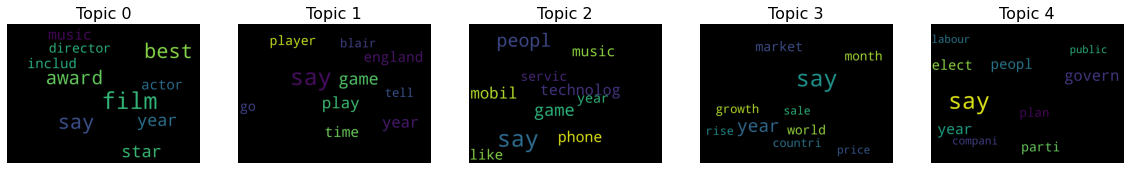

In [66]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,5,figsize=(20,30), sharex=True, sharey=True)
for i, ax in enumerate(ax.flatten()):
  fig.add_subplot(ax)
  topic_words=dict(topics[i][1])
  cloud.generate_from_frequencies(topic_words, max_font_size=300)
  plt.gca().imshow(cloud)
  plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
  plt.gca().axis('off')

#### Manual way to assign topics based on most occured words with real world NEWS category. Efficient for less topics where categories are distinct to each other.

In [ ]:
## Topic 0 contains: film, award, star, best, actor, oscar looks FILM/ENTERTAINMENT category
## Topic 1 contains most frequent words like: play, game, world, team,, player looks SPORTS category
## Topic 2 contains: compni, technolog, phone, firm, music, service, looks TECHNOLOGY category
## Topic 3 contains: market, growth, price, rise, looks BUSINESS category
## Topic 4 contains: govern, plan, elect, party, plan looks POLITICS category

In [67]:
# Testing on unseen document
test_doc='''software watching while you work software that can not only monitor every keystroke and action performed at a pc but also be used as legally binding evidence of wrong-doing has been unveiled. 
 worries about cyber-crime and sabotage have prompted many employers to consider monitoring employees. the developers behind the system claim it is a break-through in the way data is monitored and stored. 
 but privacy advocates are concerned by the invasive nature of such software.  
 the system is a joint venture between security firm 3ami and storage specialists bridgehead software. 
 they have joined forces to create a system which can monitor computer activity  store it and retrieve disputed files within minutes.
  more and more firms are finding themselves in deep water as a result of data misuse. sabotage and data theft are most commonly committed from within an organisation according to the national hi-tech crime unit (nhtcu) a survey conducted on its behalf by nop found evidence that more than 80% of medium and large companies have been victims of some form of cyber-crime. bridgehead software has come up with techniques to prove  to a legal standard  that any stored file on a pc has not been tampered with. ironically the impetus for developing the system came as a result of the freedom of information act  which requires companies to store all data for a certain amount of time. 
   the storage system has been incorporated into an application developed by security firm 3ami which allows every action on a computer to be logged. potentially it could help employers to follow the trail of stolen files and pinpoint whether they had been emailed to a third party  copied  printed  deleted or saved to cd  floppy disk  memory stick or flash card. other activities the system can monitor include the downloading of pornography  the use of racist or bullying language or the copying of applications for personal use. increasingly organisations that handle sensitive data  such as governments  are using biometric log-ins such as fingerprinting to provide conclusive proof of who was using a particular machine at any given time. privacy advocates are concerned that monitoring at work is not only damaging to employee s privacy but also to the relationship between employers and their staff.  that is not the case   said tim ellsmore  managing director of 3ami.  it is not about replacing dialogue but there are issues that you can talk through but you still need proof   he said.  
people need to recognise that you are using a pc as a representative of a company and that employers have a legal requirement to store data   he added.'''

# looks TECHNOLOGY news

In [68]:
test_bow=dic.doc2bow(preprocess(test_doc))

In [70]:
lda_model[test_bow]
# showing has topic 2 (63%--TECH.) as we stated above topic 2 might be TECHNOLOGY, 

[(2, 0.6358562), (4, 0.36123562)]

In [71]:
test_doc2='''career honour for actor dicaprio actor leonardo dicaprio s  exceptional career  has been honoured at 
the santa barbara international film festival.  the star was presented with the award by martin scorsese  
who directed him in oscar-nominated movie the aviator.  it s a lifetime achievement award  which is completely and 
utterly surreal  given i m only 30 years old   dicaprio said.  but what has it been  almost 17 years now. 
i ve done quite a few films.  a retrospective of his movies was shown.   
what s really exciting  for me  is that this is what i really love doing he added.'''
# looks ENTERTAINMENT news

In [72]:
test_bow2 = dic.doc2bow(preprocess(test_doc2))
lda_model[test_bow2]
## Topic 0 is really ENTERTAINMENT (we stated) and this news also 92% fall in that

[(0, 0.921722), (3, 0.064495586)]

#### When we have large categories to map then we can use Naive-ways-for-automatic-labelling-of-topic-models using WIKIAPI 

follow this: http://chappers.github.io/web%20micro%20log/2017/02/12/naive-ways-for-automatic-labelling-of-topic-models/